# Magnetisation Transfer Ratio (MTR) map calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.mapping.mtr import MTR

# Ensure figures are rendered in the notebook
%matplotlib inline

Tell python where to store the MTR map NIfTI file we will generate. We will store it in a directory called `mtr_calculation_output` in the `tutorials` directory.

In [2]:
# Initialise output path for B0 maps
directory = 'mtr_calculation_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

Retrieve MTR test data using our data fetcher. The first time the fetcher is run, it will download the data from the
internet, after that it will just use the cached local data.

This will return 2 variables:
* `magnitude`: a 3D array with the magnitude data at both magnetisation transfer values.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).

In [3]:
# Fetch test data
magnitude, affine = fetch.mtr_philips()

Compute the MTR map using the `MTR` class implemented in `mapping`:

In [4]:
# Initialise MTR mapping object
mapper = MTR(magnitude, affine)

mt_on = mapper.mt_on
mt_off = mapper.mt_off
mtr_map = mapper.mtr_map

# Save output maps to Nifti
mapper.to_nifti(output_directory=OUTPUT_DIR, base_file_name='MTR_Philips', maps=['mtr'])

c:\users\md1jgra\desktop\ukat\ukat\mapping\mtr.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.mt_off), posinf=0, neginf=0)
c:\users\md1jgra\desktop\ukat\ukat\mapping\mtr.py:58: RuntimeWarning: invalid value encountered in true_divide
  self.mt_off), posinf=0, neginf=0)


Display the calculated images.

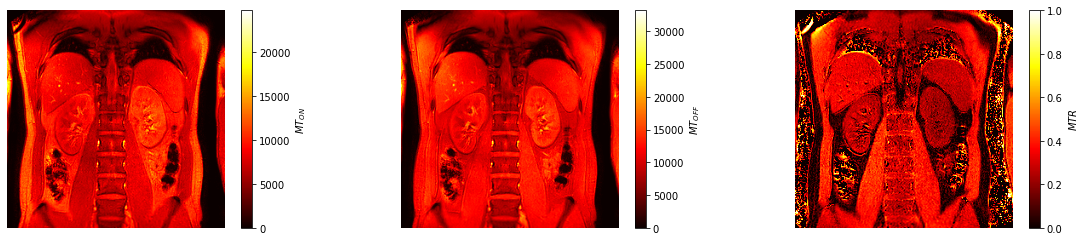

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

# Display MT_ON
im = ax1.imshow(np.rot90(mt_on), cmap='hot')
cb = fig.colorbar(im, ax=ax1)
cb.set_label('$MT_{ON}$')
ax1.axis('off')

# Display MT_OFF
im = ax2.imshow(np.rot90(mt_off), cmap='hot')
cb = fig.colorbar(im, ax=ax2)
cb.set_label('$MT_{OFF}$')
ax2.axis('off')

# Display the resulting MTR Map
im = ax3.imshow(np.rot90(mtr_map), cmap='hot', clim=(0, 1))
cb = fig.colorbar(im, ax=ax3)
cb.set_label('$MTR$')
ax3.axis('off')

plt.show()